# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Evaluating Model Fit
DS | Lesson 9

### STUDENT PRE-WORK
*Before this lesson, you should already be able to:*

- Understand goodness of fit (r-squared)
- Measure statistical significance of features
- Recall what a _residual_ is
- Implement an sklearn estimator to predict a target variable



<a name="opening"></a>
## Review

- What is r-squared?
- What is a residual?

Recall the central metric introduced for linear regressions, r-squared. If we had to compare two models we **built**, one with an r-squared of .79, and another of .81, which model performed better? If r-squared is an explanation of variance, then we know the value closer to 1 (.82) is a better model. But what about error? Does r-squared tell us how far off our predictions are? Or about the scale of that error? How do you explain r-squared to a business owner?

It is typical to use multiple prediction metrics while solving for an optimal solution to a regression problem. In particular, we're interested in the advantages of a loss function; that is, putting a cost against our prediction algorithm. While we use r-squared to inch our ways closer to 1, we'll explore loss functions and find ways to **refine** our model in order to minimize that value toward 0.

**Check:** What is r-squared? What is a residual?



#### Recalling: What's residual error?

In the last class, we reviewed one expectation of linear models: that the residual error be normal, and a median close to 0.

y = betas * x + alpha + epsilon <- epsilon == error

![residual_histogram](https://cloud.githubusercontent.com/assets/846010/11647511/d51bcfa2-9d36-11e5-8496-a29a2b01f5c1.png)

Knowing individual residual error is beneficial to the user, as it demonstrates where your error resides (do you have more outliers estimated too high? too low?). However, it is convoluted and not very effective for optimizing a model around each and every point; instead, we use summary metrics, like _mean squared error_, to summarize the error in our model into one value. Mean squared error is as it sounds: the mean, or average, residual error in our model.

#### Mean Squared Error (MSE)

For squared error, we will:

1. Calculate the difference between each target y and the models predicted predicted value y-hat (this is how we determine the _residual_)
2. Square each residual.
3. Take the mean of the squared residual error.

Sklearn's metrics module includes a mean_squared_error function. Sklearn's metrics module will be the tool we use to evaluate performance for the majority of our models


In [1]:
from sklearn import metrics
metrics.mean_squared_error(y, model.predict(X))

NameError: name 'y' is not defined

For example, if we to compare two arrays of the same values, we would expect a mean squared error of 0:


In [2]:
metrics.mean_squared_error([1, 2, 3, 4, 5], [1, 2, 3, 4, 5])

0.0

While the opposite scenario should have a mean squared error of 8:

In [3]:
metrics.mean_squared_error([1, 2, 3, 4, 5], [5, 4, 3, 2, 1])
# (4^2 + 2^2 + 0^2 + 2^2 + 4^2) / 5

8.0


#### How do we minimize error?

The regression we've been using in class is called "ordinary least squares," which literally means given a matrix X, solve for the _least_ amount of squared error for y. However, this approach assumes that the sample X is representative of the population; that is, it assumes that the sample is _unbiased_. For example, let's compare these two random models:


In [4]:
import numpy as np
import pandas as pd
from sklearn import linear_model

import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.DataFrame({'x': range(100), 'y': range(100)})
biased_df  = df.copy()
biased_df.loc[:20, 'x'] = 1
biased_df.loc[:20, 'y'] = 1

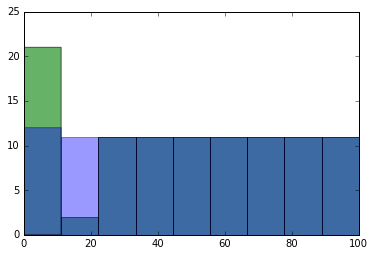

In [6]:
bins = np.linspace(0, 100, 10)
plt.hist(biased_df.x,color='g',alpha=0.6,bins=bins)
plt.hist(df.x,color='b',alpha=0.4,bins=bins)
plt.xlim((0,100))
plt.show()

In [7]:
def append_jitter(series):
    jitter = np.random.random_sample(size=100)
    return series + jitter

In [8]:
df['x'] = append_jitter(df.x)
df['y'] = append_jitter(df.y)

biased_df['x'] = append_jitter(biased_df.x)
biased_df['y'] = append_jitter(biased_df.y)

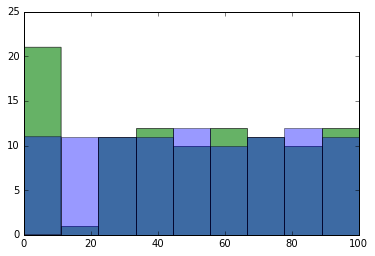

In [9]:
bins = np.linspace(0, 100, 10)
plt.hist(biased_df.x,color='g',alpha=0.6,bins=bins)
plt.hist(df.x,color='b',alpha=0.4,bins=bins)
plt.xlim((0,100))
plt.show()

In [10]:
# Fit:
lm = linear_model.LinearRegression().fit(df[['x']], df['y'])
metrics.mean_squared_error(df['y'], lm.predict(df[['x']]))

0.18336471078077515

In [11]:
# Biased fit:
lm_b = linear_model.LinearRegression().fit(biased_df[['x']], biased_df['y'])
metrics.mean_squared_error(df['y'], lm_b.predict(df[['x']]))

0.18389752791431385


![Explanation of bias error](http://i.stack.imgur.com/JLDET.png)

When our error is described as _biased_, it means that the learner's prediction is consistently far away from the actual answer. This is a sign of poor sampling: perhaps the population is not well represented in the model, or other data needs to be collected.

Otherwise, one objective of a _biased_ model is to trade this biased error for _generalized_ error. That is, we'd prefer if the error was distributed more evenly across the model, even if that means it doesn't explain the sample as well. This is called error due to _variance_.

Since the whole point of prediction is for a model to work on data that the model hasn't seen yet, your want your model to perform _generally_ well on new data! If your model has a lot of _bias_, then even if you have a good r-squared or mean squared error from learned data, it could still perform **poorly** on new predictive data.

**Check:** Which of the following scenarios would be better for a weatherman?:

1. Knowing that I can very accurately "predict" the temperature outside from previous days perfectly, but be 20-30 degrees off for future days?
2. Knowing that I can accurately predict the general trend of the temperate outside from previous days, and therefore am at most only 10 degrees off on future days?

## Bias / Variance Tradeoff
![bias variance tradeoff](./assets/images/bvt.png)

**Generally**, we'll want to find the model with the *lowest error that generalizes to unseen data*. This means managing our sources of error, and adjusting our model and process to find the optimal balance.


This is a [dataset](http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt) of the average weight of the body and the brain for 62 mammal species. Let's read it into pandas and take a quick look:

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.lmplot

In [24]:
path = r'..\..\datasets\mammals.txt'
cols = ['brain','body']
mammals = pd.read_table(path, sep='\t', names=cols, header=0)
mammals.describe()

,brain,body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [25]:
# We're going to focus on a smaller subset in which the body weight is less than 200:
mammals = mammals[mammals.body < 200]
mammals.shape

(51, 2)

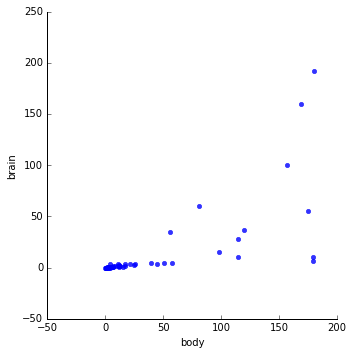

In [28]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, fit_reg=False);

There appears to be a relationship between brain and body weight for mammals.

### Making a prediction

Now let's pretend that a **new mammal species** is discovered. We measure the body weight of every member of this species that we can find, and calculate an **average body weight of 100**. We want to **predict the average brain weight** of this species (rather than measuring it directly). How might we do this?


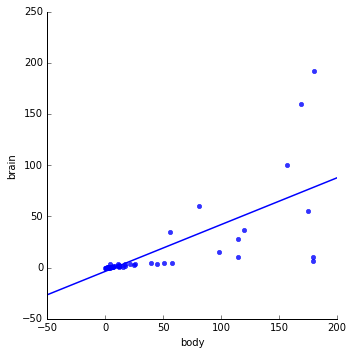

In [29]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None);

We drew a straight line that appears to best capture the relationship between brain and body weight. So, we might predict that our new species has a brain weight of about 45, since that's the approximate y value when x=100.

This is known as a "linear model" or a "linear regression model."

### Making a prediction from a sample

Earlier, I said that this dataset contained every known mammal species. That's very convenient, but **in the real world, all you ever have is a sample of data**. A more realistic situation would be to only have brain and body weights for (let's say) half of the 51 known mammals.

When that new mammal species (with a body weight of 100) is discovered, we still want to make an accurate prediction for the brain weight, but this task might be more difficult since we don't have all of the data that we would ideally like to have.

Let's simulate this situation by assigning each of the 51 observations to **either universe 1 or universe 2**:

In [31]:
# set a random seed for reproducibility
np.random.seed(12345)

# randomly assign every observation to either universe 1 or universe 2
mammals['universe'] = np.random.randint(1, 3, len(mammals))

**Important:** We only live in one of the two universes. Both universes have 51 known mammal species, but each universe knows the brain and body weight for different species.

We can now tell Seaborn to create two plots, in which the left plot only uses the data from **universe 1** and the right plot only uses the data from **universe 2**:

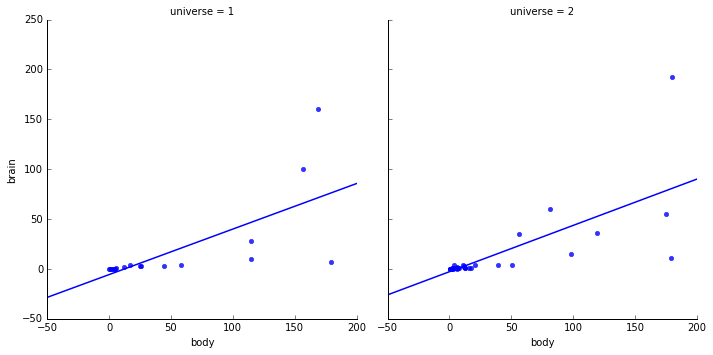

In [33]:
# col='universe' subsets the data by universe and creates two separate plots
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe');

The line looks pretty similar between the two plots, despite the fact that they used separate samples of data. In both cases, we would predict a brain weight of about 45.

It's easier to see the degree of similarity by placing them on the same plot:

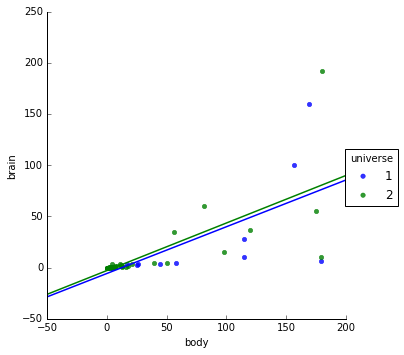

In [34]:
# hue='universe' subsets the data by universe and creates a single plot
sns.lmplot(x='body', y='brain', data=mammals, ci=None, hue='universe');

What was the point of this exercise? This was a visual demonstration of a high bias, low variance model:

- It's **high bias** because it doesn't fit the data particularly well.
- It's **low variance** because it doesn't change much depending on which observations happen to be available in that universe.

### Let's try something completely different

What would a **low bias, high variance** model look like? Let's try polynomial regression, with an eighth order polynomial:

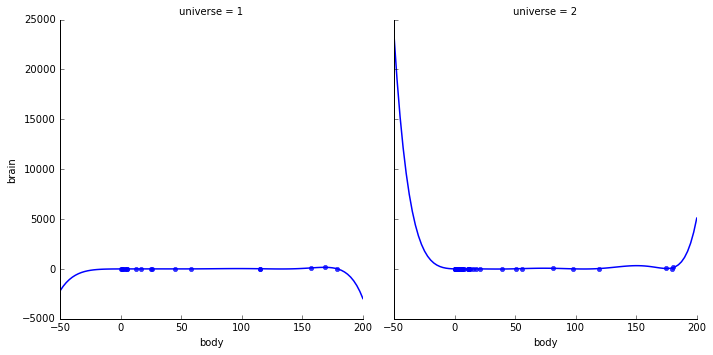

In [38]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=8)

- It's **low bias** because the models match the data quite well!
- It's **high variance** because the models are widely different depending on which observations happen to be available in that universe. (For a body weight of 100, the brain weight prediction would be 40 in one universe and 0 in the other universe!)

## Can we find a middle ground?

Perhaps we can create a model that has **less bias than the linear model**, and **less variance than the eighth order polynomial**?

Let's try a second order polynomial instead:

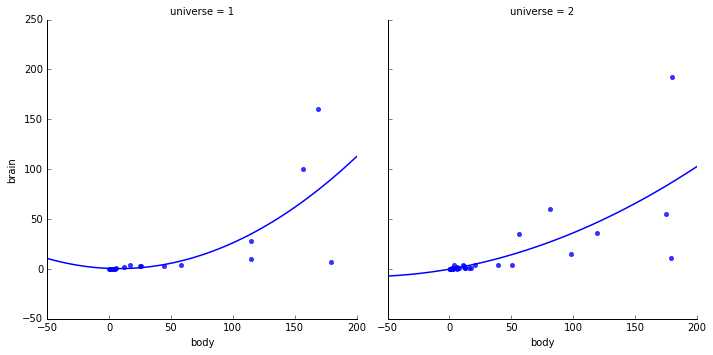

In [39]:
sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='universe', order=2);

This seems better. In both the left and right plots, **it fits the data pretty well, but not too well**.

This is the essence of the **bias-variance tradeoff**: You are seeking a model that appropriately balances bias and variance, and *thus will generalize to new data* (known as "out-of-sample" data).

## Overfitting?

![overfitting](https://cloud.githubusercontent.com/assets/846010/11647961/77c2781e-9d3c-11e5-9793-363dab993e14.png)

Above, we see three different linear models (yes, even the two "curved," polynomial models are linear!).

The first model, which is relatively flat, poorly explains roughly half the data. From our visual, it is clear that this is not a representative model.

The second model, a single polynomial curve, helps explain the general curve of our data. While there is error, it is spread throughout the entire dataset, and if plotted, the residuals would likely be normally distributed.

The last mode, (which is roughly a polynomial model up to the 13th power), is _overfit_ to the data. It matches each value perfectly. However, when attempting to predict new data it has not seen, we would expect this model to fail.

<a name="demo-cv"></a>
## Demo: Cross Validation (20 minutes)

One approach data scientists use to account for bias is cross validation. The basic idea of cross validation is to generate several models based on different cross sections of the data, measure performance of each, and then take the mean performance. This technique is one way to swap bias error for generalized error in our model.

In other words, this method helps us create weatherman Scenario 2 - describing previous trends with a general amount of accuracy in order to make more specifically accurate predictions about future trends.

One of the most common cross validation techniques is called **k-fold**: split the data into _k_ groups, _train_ the data on all segments except one, and then _test_ the performance on the remaining set. If k equals five, then you split the data into five groups and generate five different models.

What happens to mean squared error if we use k-fold validation to _generalize_ the error?

![crossvalidation_kfold](./assets/images/26155106_OfXx.png)



In [40]:
from sklearn import cross_validation
wd = '../../datasets/'
bikeshare = pd.read_csv(wd + 'bikeshare.csv')
weather = pd.get_dummies(bikeshare.weathersit, prefix='weather')
modeldata = bikeshare[['temp', 'hum']].join(weather[['weather_1', 'weather_2', 'weather_3']])
y = bikeshare.casual

In [41]:
kf = cross_validation.KFold(len(modeldata), n_folds=5, shuffle=True)

In [42]:
scores = []

for train_index, test_index in kf:
    x_train = modeldata.iloc[train_index]
    x_test = modeldata.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]
    
    
    lm = linear_model.LinearRegression()
    lm.fit(x_train, y_train)
    
    scores.append(metrics.mean_squared_error(y_test, lm.predict(x_test)))
    
np.mean(scores)

1674.3573943040324

In [43]:
scores

[1675.1833517159066,
 1513.8132392421689,
 1574.4633480393086,
 1974.3079688785811,
 1634.0190636441955]

In [44]:
# This score will be lower, but we're trading off bias error for generalized error:
lm = linear_model.LinearRegression().fit(modeldata, y)
metrics.mean_squared_error(y, lm.predict(modeldata))

1672.5811076539349

**Check**: While the cross validated approach here generated more overall error, which of the two approaches would predict new data more accurately: the single model or the cross validated, averaged one? Why?


<a name="guided-practice-cv"></a>
## Guided Practice: Cross Validation with Linear Regression

If we were to continue increasing the number of folds in cross validation, which each increase would also increase the training set? Do you expect error to increase or decrease?

Apply the following code through a loop of numbers 2 to 50 and find answers to the following questions: `range(2, 51, 2)`

1. What does `shuffle=True` do?
2. At what point does cross validation no longer seem to help the model? The error line should look similar to a flat line.

In [45]:
# hint: how many loops should you use? What measure are you evaluating?
kf_scores = {}

for i in range(2,51,2):
    kf = cross_validation.KFold(len(modeldata), n_folds=i)

    scores = []

    for train_index, test_index in kf:
        lm = linear_model.LinearRegression()
        lm.fit(modeldata.iloc[train_index], y.iloc[train_index])
        scores.append(metrics.mean_squared_error(y.iloc[test_index], lm.predict(modeldata.iloc[test_index])))
    
    kf_scores[i] = np.mean(scores)
    

In [46]:
kf_scores

{2: 1856.0956218085767,
 4: 1742.2149632547462,
 6: 1762.1571601770083,
 8: 1742.8048659765382,
 10: 1743.9173357170889,
 12: 1730.1002524494172,
 14: 1717.4198377655214,
 16: 1718.9168284185994,
 18: 1713.1790648185661,
 20: 1712.2576677878194,
 22: 1711.1915349716232,
 24: 1705.8257351331456,
 26: 1705.9124324178015,
 28: 1701.6815841241621,
 30: 1704.7671545033418,
 32: 1700.560761127002,
 34: 1698.995749036229,
 36: 1696.5733057532129,
 38: 1695.7771576675907,
 40: 1697.5922551134051,
 42: 1696.6370291232738,
 44: 1694.7904556576409,
 46: 1693.8747820722947,
 48: 1693.8843883294558,
 50: 1694.1765889286412}


#### What's Regularization? And why do we use it?

_Regularization_ is an additive approach to protect models against _overfitting_, or being potentially biased and overconfident. In regressions, regularization becomes an additional weight to coefficients, which is either added (L1) or squared and then added (L2). These are also known as Lasso and Ridge Regressions, which we experimented with during our last class. As good practice, we should use Lasso (L1) when we have a higher number of features (k) than we have observations (n), and use Ridge (L2) in about all other cases.

#### Remember overfitting?

![overfitting](https://cloud.githubusercontent.com/assets/846010/11647961/77c2781e-9d3c-11e5-9793-363dab993e14.png)

Regularization, which introduces the weights to these coefficients, would help prevent this last model from being a perfect fit, and would generate a model that would be applicable to a wider set of data.

#### Where Regularization Makes Sense
Consider this: what happens to MSE if we just directly use a Lasso or Ridge Regression?


In [47]:
mse = []

lm = linear_model.LinearRegression().fit(modeldata, y)
mse.append(metrics.mean_squared_error(y, lm.predict(modeldata)))
lm = linear_model.Lasso().fit(modeldata, y)
mse.append(metrics.mean_squared_error(y, lm.predict(modeldata)))
lm = linear_model.Ridge().fit(modeldata, y)
mse.append(metrics.mean_squared_error(y, lm.predict(modeldata)))

pd.DataFrame({'reg':['OLS','L1','L2'],'score':mse})

,reg,score
0,OLS,1672.581108
1,L1,1725.415816
2,L2,1672.604901


In this example; L1 (lasso) massively increases our error (likely from not fitting to the L1 criteria), and L2 also increases the error. What gives?

Regularization, like any important optimization function, will be more important during _cross validation_. In particular, we will optimize the regularization weight parameter _through_ cross validation.

**Check:** Why is regularization important? What does it protect against and how?

![Bias-variance tradeoff](./assets/images/training_testing_error.png)

## Demo: Understanding Regularization Effects

**Check:** We are working with the bike-share data to predict riders over hours/days with a few features. Why does it make sense to use a ridge regression over a lasso regression?

Let's test a variety of alpha weights for Ridge Regression on the bike-share data.

In [48]:

alphas = np.logspace(-10, 10, 21)
for a in alphas:
    print 'Alpha:', a
    lm = linear_model.Ridge(alpha=a)
    lm.fit(modeldata, y)
    print lm.coef_
    print metrics.mean_squared_error(y, lm.predict(modeldata))


Alpha: 1e-10
[ 112.68901765  -84.01121684  -24.68489063  -21.00314493  -21.71893628]
1672.58110765
Alpha: 1e-09
[ 112.68901765  -84.01121684  -24.68489061  -21.00314491  -21.71893626]
1672.58110765
Alpha: 1e-08
[ 112.68901765  -84.01121684  -24.6848904   -21.00314471  -21.71893606]
1672.58110765
Alpha: 1e-07
[ 112.68901763  -84.01121682  -24.68488837  -21.00314268  -21.71893403]
1672.58110765
Alpha: 1e-06
[ 112.68901745  -84.01121667  -24.68486804  -21.00312237  -21.71891373]
1672.58110765
Alpha: 1e-05
[ 112.68901562  -84.01121509  -24.68466472  -21.00291929  -21.71871079]
1672.58110765
Alpha: 0.0001
[ 112.68899732  -84.01119938  -24.68263174  -21.00088873  -21.71668161]
1672.58110765
Alpha: 0.001
[ 112.68881437  -84.01104228  -24.66232204  -20.98060316  -21.69640993]
1672.58110774
Alpha: 0.01
[ 112.68698753  -84.00947323  -24.46121539  -20.77973778  -21.49568404]
1672.58111645
Alpha: 0.1
[ 112.66896732  -83.99396383  -22.63109556  -18.95202277  -19.66942371]
1672.58185208
Alpha: 1.0
[

1. What happens to the weights of the coefficients as alpha increases?
2. What happens to the error as alpha increases

#### Make this easier! Introducing: Grid Search

We can tell sklearn to try all of these alphas in less code using a _grid search_. Grid search sounds exactly like what it means: telling the computer to exhaustively search through all options to find the best solution.

A grid search will end up trying as many combos as you specify in the `param_grid` argument. For example:

In [ ]:

params = {
    'intercept': [True, False],
    'alpha': [1, 2, 3],
}


This `param_grid` has 6 different options:

1. intercept True, alpha 1
2. intercept True, alpha 2
3. intercept True, alpha 3
4. intercept False, alpha 1
5. intercept False, alpha 2
6. intercept False, alpha 3

This makes grid search an incredibly powerful tool in machine learning! Check out the example below.

In [ ]:

from sklearn import grid_search

alphas = np.logspace(-10, 10, 21)
gs = grid_search.GridSearchCV(
    estimator=linear_model.Ridge(),
    param_grid=params,
    scoring='mean_squared_error')

gs.fit(modeldata, y)

print -gs.best_score_ # mean squared error here comes in negative, so let's make it positive.
print gs.best_estimator_ # explains which grid_search setup worked best
print gs.grid_scores_ # shows all the grid pairings and their performances.


<a name="introduction-gds"></a>
## Minimizing Loss Through Gradient Descent (15 mins)

One last approach to minimizing error is Gradient Descent. The concept behind Gradient Descent could be explained in the following steps:

1. A random linear solution is provided as a starting point (usually a "flat" line or solution)
2. The solver then attempts to find a next step: we take a step in any direction and measure each performance.
3. If the solver finds a better solution (optimizing toward a metric such as mean squared error), this is the new starting point.
4. Repeat these steps until the performance is optimized and no "next steps" perform better. The size of the steps will shrink over time.

Gradient Descent is very similar to traversal or dynamic programming, programming concepts that by design work through iteration. For example, if you had a bunch of user data about Facebook checkins and wanted to solve for the longest path (total number of days) of continual checkins, that would be solved through dynamic programming.



##### Gradient Descent, 1d
![SGD 1](./assets/images/sgd_optimal.png)

##### Gradient Descent, 2d
![SGD 2](./assets/images/sgd_2d.png)


#### Stepping away from the data and getting the concept right

Walk through this code, which suggests a similar pattern to how gradient descent behaves:

In [49]:

num_to_approach, start, steps, optimized = 6.2, 0., [-1, 1], False


while not optimized:
    current_distance = num_to_approach - start
    got_better = False
    next_steps = [start + i for i in steps]
    for n in next_steps:
        distance = np.abs(num_to_approach - n)
        if distance < current_distance:
            got_better = True
            print distance, 'is better than', current_distance
            current_distance = distance
            start = n
    if got_better:
        print 'found better solution! using', current_distance
        a += 1
    else:
        optimized = True
        print start, 'is closest to', num_to_approach



5.2 is better than 6.2
found better solution! using 5.2
4.2 is better than 5.2
found better solution! using 4.2
3.2 is better than 4.2
found better solution! using 3.2
2.2 is better than 3.2
found better solution! using 2.2
1.2 is better than 2.2
found better solution! using 1.2
0.2 is better than 1.2
found better solution! using 0.2
6.0 is closest to 6.2


**Check:**
1. What is the code doing?
2. What could go wrong?

One particular challenge with gradient descent is that it could potentially solve for a _local_ minimum of error, instead of a _global_ minimum.

##### Global vs Local Minimum
You can think of the difference between _local_ minimum and _global_ minimum in terms of directions. Let's say you're trying to get to your relative's house and you have a choice between shortest distance and fastest route.

A _local_ minimum distance would look at a very small part of the map and try to optimize for that section. This would be equivalent to telling you the "shortest distance," since it only looks at a small sliver of information: your location and your destination.

However, solving for _global_ minimum would be equivalent to choosing the "fastest route". A _global_ minimum distance would zoom out and look at the sum of all the different data sections. This would take into account information that might be left out of a single _local_ minimum sample, like for instance: construction or heavy traffic. In this case, the "fastest route" would give you a more complete set of directions based on a broader sample of the available data.

![Optimum Examples](http://i.stack.imgur.com/XaKx6.png)

In this chart, our local optimum distance gets you close to your desired location but stuck in heavy traffic; meanwhile, the global optimum returns a longer route but is a much better solution for actually getting to where you want to go.

![SGD 3](./assets/images/sgd_3d.png)

***

<a name="demo-gds"></a>
## Demo: Application of Gradient Descent (15 mins)

Gradient Descent works best when:

1. We are working with a large data set. Smaller sets are more prone to error, and proneness to error could be steps in the wrong direction.
2. Data is severely cleaned up and normalized (such as the bike-share data set).

Gradient descent's advantages are huge: with a very large data set, OLS will take significantly longer to solve (computationally). We may not notice it as much on the smaller data sets in class, but in a live system with millions of data points, gradient descent is vastly superior. You'll particularly see this with the regressors `partial_fit()` function.

Like Ridge and Lasso regression, we can penalize (add in weights) to the gradient descent solver.

To follow along with either our "grandmother's house" example or the python example code above, try turning the estimator's argument `verbose` to 1. It will print its optimizations up to the number of iterations you allow it to run (default is 5).



In [50]:

lm = linear_model.SGDRegressor()
lm.fit(modeldata, y)
print lm.score(modeldata, y)
print metrics.mean_squared_error(y, lm.predict(modeldata))


0.308581320177
1680.73242953


**Check:** Untuned, how well did gradient descent perform compared to OLS?


Bonus: SGD vs. GD

![GD vs SGD](./assets/images/gd_sgd.png)